In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install fancyimpute

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from fancyimpute import IterativeImputer

#**Description of the columns**

url-->Uniform Resource Locator

address-->Address of the restaurant

name-->Name of the restaurant

online_order-->if the restaurant supports online order or not

Yes-->1

No-->0

book_table-->if the restuarant supports table booking or not

Yes-->1

No-->0

rate-->Rating of the restaurant

votes-->Votes of the restaurant

phone-->Phone number of the restaurant

location-->Location of the restaurant

rest_type-->Type of restaurant

dish_liked-->Dishes liked mostly in the restaurant

cuisines-->Cuisines in the restaurant

approx_cost(for two people)-->Approximate charge for two people

reviews_list-->List of reviews about the restaurant

menu_item-->List of menu in the restaurant

listed_in(type)-->Mode of the restaurant

listed_in(city)-->City of the restaurant


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/zomato.csv')
data

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

Dropping of the following columns, since our target is to find the location where we can build a restaurant

In [ ]:
data.drop(columns=['url','address','phone','reviews_list','menu_item','location','dish_liked'],inplace=True)

Cleaning rate columns into float format

In [ ]:
def handlerate(value):
  if(value=="NEW" or value=='-'):
    return np.NaN
  else:
    value=str(value).split('/')
    value=value[0]
    return float(value)
data['rate']=data['rate'].apply(handlerate)

Cleaning approx_cost(for two people) column into integer format

In [ ]:
def handlecomma(value):
  if pd.isna(value) or value=='nan':
    return np.NaN
  value=str(value)
  if ',' in value:
    value=value.replace(',','')
    return int(value)
  else:
    return int(value)

data['approx_cost(for two people)']=data['approx_cost(for two people)'].apply(handlecomma)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51717 non-null  object 
 1   online_order                 51717 non-null  object 
 2   book_table                   51717 non-null  object 
 3   rate                         41665 non-null  float64
 4   votes                        51717 non-null  int64  
 5   rest_type                    51490 non-null  object 
 6   cuisines                     51672 non-null  object 
 7   approx_cost(for two people)  51371 non-null  float64
 8   listed_in(type)              51717 non-null  object 
 9   listed_in(city)              51717 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 3.9+ MB


Using Iterative Imputer, to impute the missing values on rate and approx_cost(for two people)

Iterative Imputer, take mutiple imputation methods and consider the best value for missing value.

In [ ]:
imputer = IterativeImputer()

data['rate'] = imputer.fit_transform(data['rate'].values.reshape(-1, 1))
data['approx_cost(for two people)'] = imputer.fit_transform(data['rate'].values.reshape(-1, 1))
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51717 non-null  object 
 1   online_order                 51717 non-null  object 
 2   book_table                   51717 non-null  object 
 3   rate                         51717 non-null  float64
 4   votes                        51717 non-null  int64  
 5   rest_type                    51490 non-null  object 
 6   cuisines                     51672 non-null  object 
 7   approx_cost(for two people)  51717 non-null  float64
 8   listed_in(type)              51717 non-null  object 
 9   listed_in(city)              51717 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 3.9+ MB


In [ ]:
data.dropna(inplace=True)
[feature for feature in data.columns if data[feature].isnull().sum()>0]

[]

Now the dataset doesnt have any null values.

In [ ]:
duplicate_rows = data[data.duplicated()]
duplicate_rows

,name,online_order,book_table,rate,votes,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
596,My Tea House,Yes,Yes,3.700449,0,Casual Dining,"Continental, Asian, North Indian, Tea",3.700449,Dine-out,Banashankari
2235,Shiv Sagar,No,No,3.600000,10,Food Court,"South Indian, Beverages",3.600000,Dine-out,Bannerghatta Road
3763,The Fisherman's Wharf,Yes,Yes,4.400000,4099,"Casual Dining, Bar","Seafood, Goan, North Indian, Continental, Asian",4.400000,Buffet,Bellandur
4144,Artinci Artisanal Ice Cream,Yes,No,3.700449,0,Dessert Parlor,"Ice Cream, Desserts",3.700449,Delivery,Bellandur
4339,Biryani Treat,No,No,3.700449,0,Quick Bites,Biryani,3.700449,Delivery,Bellandur
...,...,...,...,...,...,...,...,...,...,...
50011,Best Biryani,No,No,3.700449,0,Quick Bites,"North Indian, Biryani, Desserts",3.700449,Dine-out,Sarjapur Road
50379,House Of Candy,Yes,No,3.700449,0,Confectionery,Desserts,3.700449,Delivery,Whitefield
50405,House Of Candy,Yes,No,3.700449,0,Confectionery,Desserts,3.700449,Delivery,Whitefield
50793,Ghar ka Khana,No,No,3.700449,0,Delivery,North Indian,3.700449,Delivery,Whitefield


In [ ]:
data.drop_duplicates(inplace=True)
duplicate_rows = data[data.duplicated()]
duplicate_rows.count()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64

There are no duplicate rows in the dataset

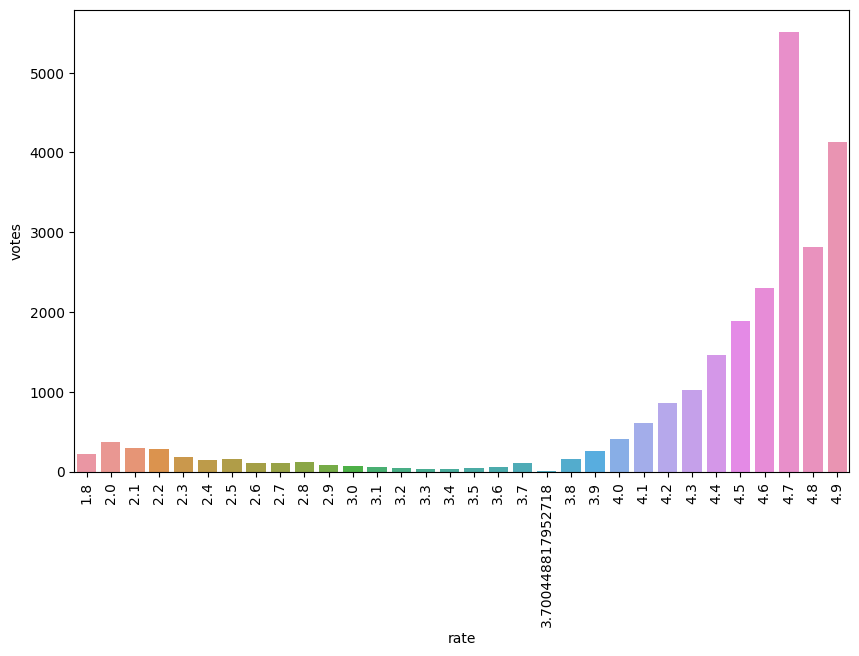

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x="rate",y="votes",data=data,errorbar=None)
plt.xticks(rotation=90)
plt.show()

Inference:
4.7 is the rating given for majority of restaurants


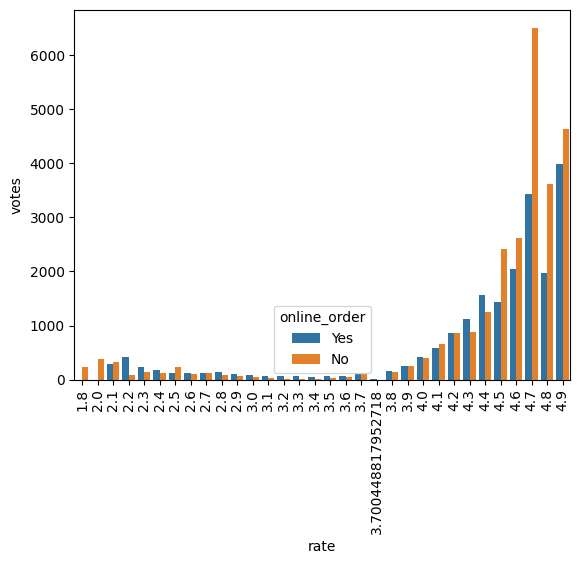

In [ ]:
sns.barplot(x="rate",y="votes",hue='online_order',errorbar=None,data=data)
plt.xticks(rotation=90)
plt.show()

Inference:
The highest rating obtained restaurant does not support online order in a high range

<Axes: xlabel='online_order', ylabel='count'>

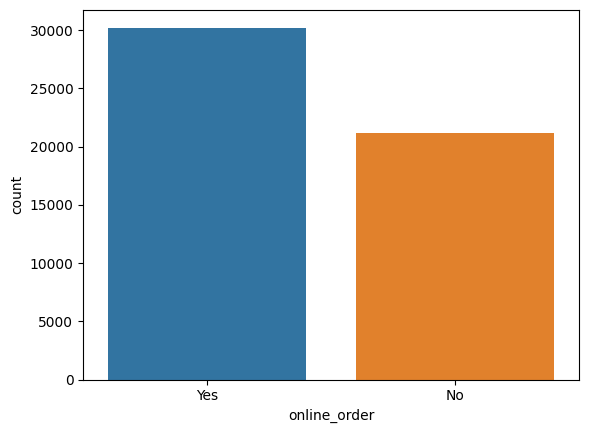

In [ ]:
sns.countplot(x='online_order',data=data)

Inference:
Most of the restaurants support online order


In [ ]:
data.rename(columns={'approx_cost(for two people)':'Cost_of_two','listed_in(type)':'Mode_of_restaurant'},inplace=True)

Cleaning Rest Type Column


In [ ]:
rest_types=data['rest_type'].value_counts(ascending=False)
rest_types_lessthan1000=rest_types[rest_types<1000]
rest_types_lessthan1000

Beverage Shop                 863
Bar                           697
Food Court                    620
Sweet Shop                    468
Bar, Casual Dining            420
                             ... 
Dessert Parlor, Kiosk           2
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      2
Sweet Shop, Dessert Parlor      1
Quick Bites, Kiosk              1
Name: rest_type, Length: 85, dtype: int64

Making Rest Types less than 1000 in frequency as other

In [ ]:
def handle_rest_type(value):
  if(value in rest_types_lessthan1000):
    return 'others'
  else:
    return value
data['rest_type']=data['rest_type'].apply(handle_rest_type)
data['rest_type'].value_counts()

Quick Bites           19086
Casual Dining         10305
others                 9065
Cafe                   3727
Delivery               2589
Dessert Parlor         2246
Takeaway, Delivery     2029
Casual Dining, Bar     1148
Bakery                 1140
Name: rest_type, dtype: int64

Cleaning Cuisines Column

In [ ]:
cuisines=data['cuisines'].value_counts(ascending=False)

Segregating only the cuisines count having less than 100
and putting them under the name others

In [ ]:
cuisines_lessthan100=cuisines[cuisines<100]

In [ ]:
def handle_cuisines(value):
  if(value in cuisines_lessthan100):
    return 'others'
  else:
    return value
data['cuisines']=data['cuisines'].apply(handle_cuisines)
data['cuisines'].value_counts()

others                                 26297
North Indian                            2892
North Indian, Chinese                   2357
South Indian                            1825
Bakery, Desserts                         906
                                       ...  
South Indian, Chinese, North Indian      105
North Indian, Mughlai, Chinese           104
South Indian, Fast Food                  104
Italian, Pizza                           102
North Indian, Chinese, Seafood           102
Name: cuisines, Length: 70, dtype: int64

In [ ]:
data1=data
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51335 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                51335 non-null  object 
 1   online_order        51335 non-null  object 
 2   book_table          51335 non-null  object 
 3   rate                51335 non-null  float64
 4   votes               51335 non-null  int64  
 5   rest_type           51335 non-null  object 
 6   cuisines            51335 non-null  object 
 7   Cost_of_two         51335 non-null  float64
 8   Mode_of_restaurant  51335 non-null  object 
 9   listed_in(city)     51335 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 4.3+ MB


Visualizing Online Order vs Rate

<Axes: xlabel='online_order', ylabel='rate'>

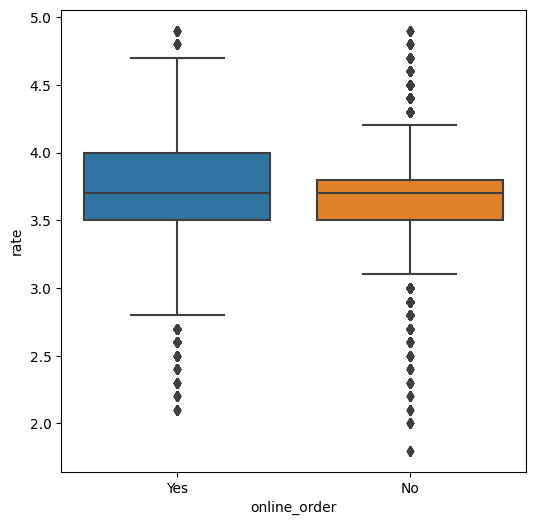

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=data)

Inference:
The online order supporting restaurants rating is between 3.5 to 4
and more in amount compared to the restaurants which does not support online order


Visualizing Book Table vs Rate

<Axes: xlabel='book_table', ylabel='rate'>

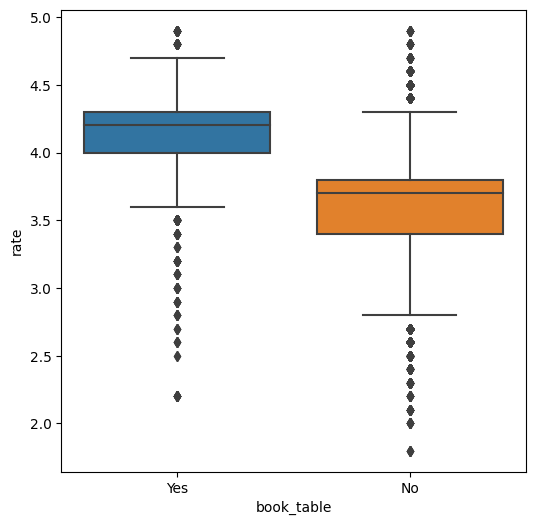

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(x='book_table',y='rate',data=data)

Inference:
The restaurants which support the book table facility has the highest rating


Visualizing Online Order Facility,Location Wise


In [ ]:
df1=data.groupby(['listed_in(city)','online_order'])['name'].count()
df1.to_csv('location_online.csv')
df1=pd.read_csv('location_online.csv')
df1=pd.pivot_table(df1,index=['listed_in(city)'],columns=['online_order'],aggfunc=np.sum)
df1

name      
online_order             No   Yes
listed_in(city)                  
BTM                    1142  2109
Banashankari            317   542
Bannerghatta Road       600  1002
Basavanagudi            471   794
Bellandur               400   810
Brigade Road            850   916
Brookefield             540   956
Church Street           936   856
Electronic City         660   557
Frazer Town             472   711
HSR                     551  1182
Indiranagar             785  1062
JP Nagar                749  1327
Jayanagar               781  1578
Kalyan Nagar            520   773
Kammanahalli            544   769
Koramangala 4th Block   981  1783
Koramangala 5th Block  1054  1763
Koramangala 6th Block   951  1660
Koramangala 7th Block  1132  1791
Lavelle Road            998   739
MG Road                 941   861
Malleshwaram            432   661
Marathahalli            695   944
New BEL Road            331   407
Old Airport Road        611   801
Rajajinagar             534   539
Residency Road          912   704
Sarjapur Road           478   769
Whitefield              754   847

<Axes: xlabel='listed_in(city)'>

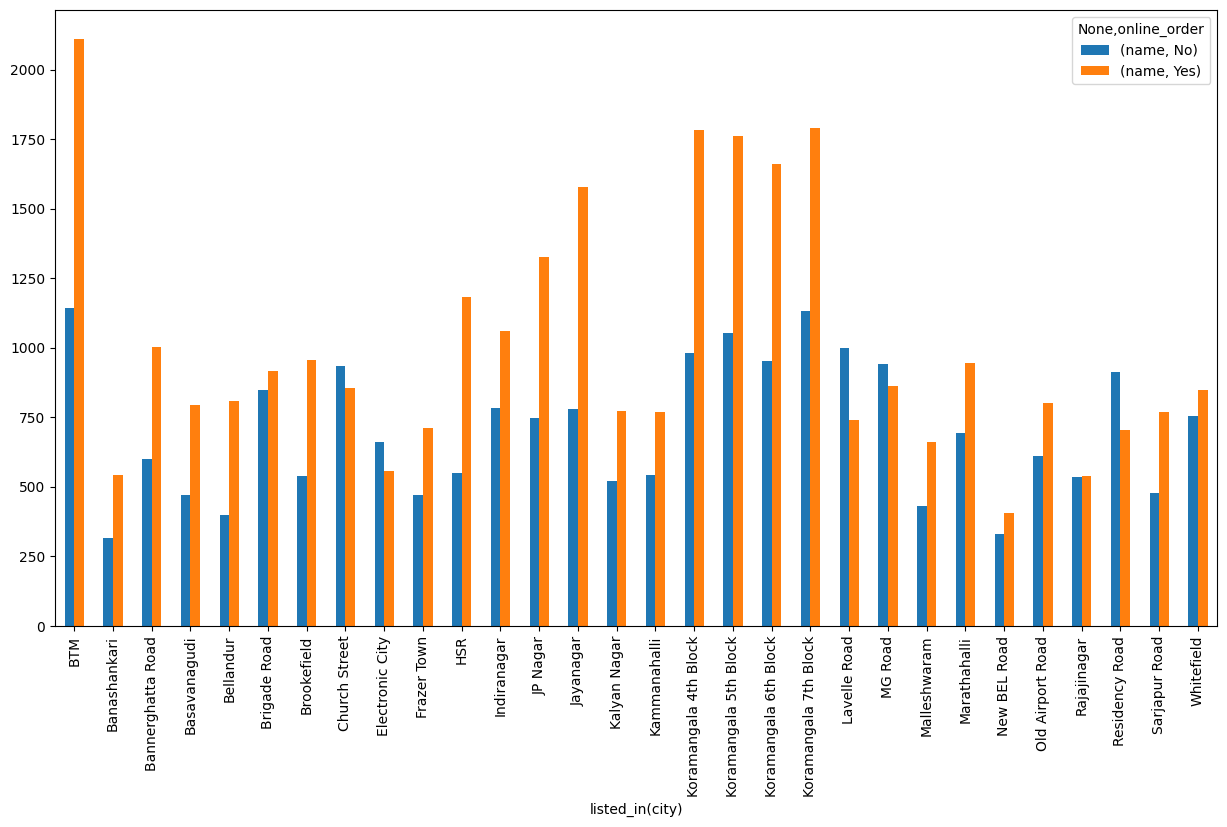

In [ ]:
df1.plot(kind='bar',figsize=(15,8))

Inference:

BTM has high online orders


Visualizing Book Table Facility,Location Wise


In [ ]:
df2=data.groupby(['listed_in(city)','book_table'])['name'].count()
df2.to_csv('location_booktable.csv')
df2=pd.read_csv('location_booktable.csv')
df2=pd.pivot_table(df2,values=None,index=['listed_in(city)'],columns=['book_table'],fill_value=0,aggfunc=np.sum)
df2

name     
book_table               No  Yes
listed_in(city)                 
BTM                    2873  378
Banashankari            817   42
Bannerghatta Road      1485  117
Basavanagudi           1142  123
Bellandur              1077  133
Brigade Road           1417  349
Brookefield            1372  124
Church Street          1435  357
Electronic City        1122   95
Frazer Town            1054  129
HSR                    1554  179
Indiranagar            1515  332
JP Nagar               1886  190
Jayanagar              2105  254
Kalyan Nagar           1173  120
Kammanahalli           1205  108
Koramangala 4th Block  2398  366
Koramangala 5th Block  2457  360
Koramangala 6th Block  2282  329
Koramangala 7th Block  2544  379
Lavelle Road           1410  327
MG Road                1447  355
Malleshwaram            969  124
Marathahalli           1487  152
New BEL Road            688   50
Old Airport Road       1184  228
Rajajinagar             983   90
Residency Road         1308  308
Sarjapur Road          1119  128
Whitefield             1411  190

<Axes: xlabel='listed_in(city)'>

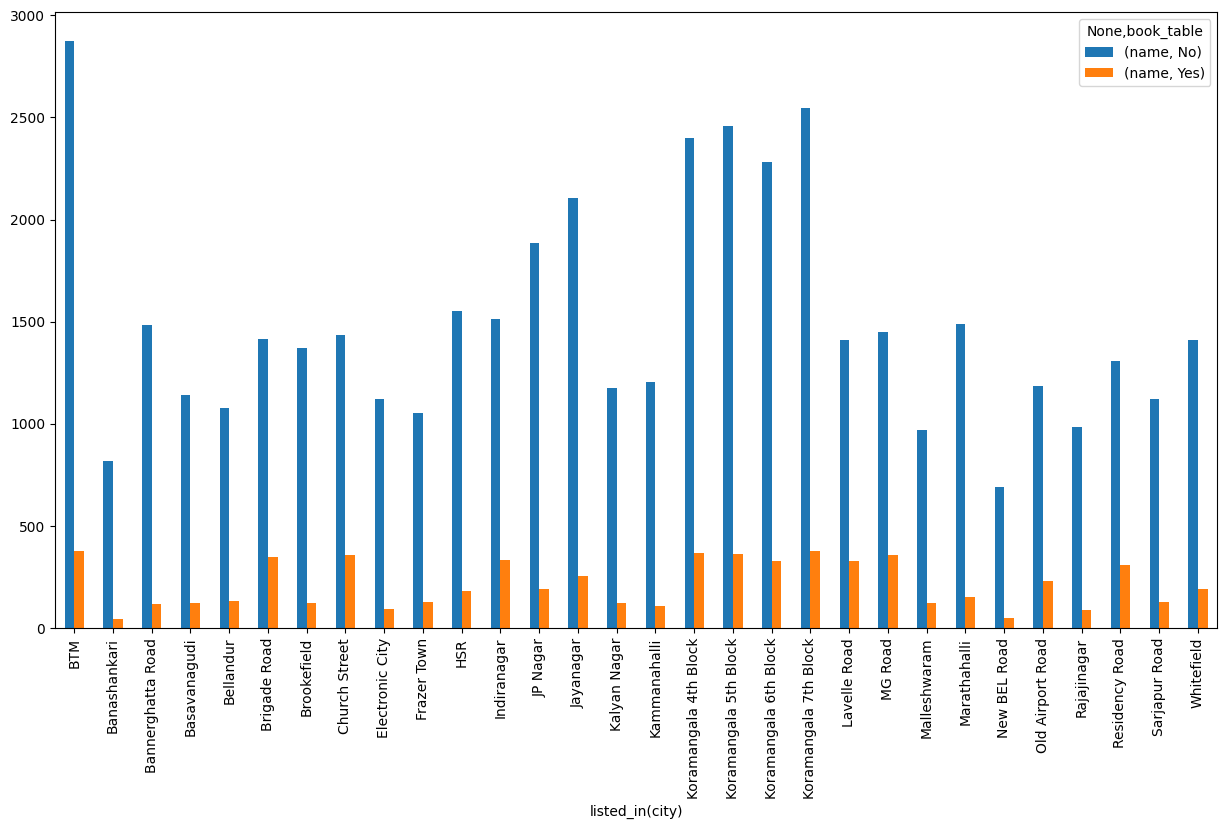

In [ ]:
df2.plot(kind='bar',figsize=(15,8))

Visualizing Types of Restaurants vs Rate

<Axes: xlabel='Mode_of_restaurant', ylabel='rate'>

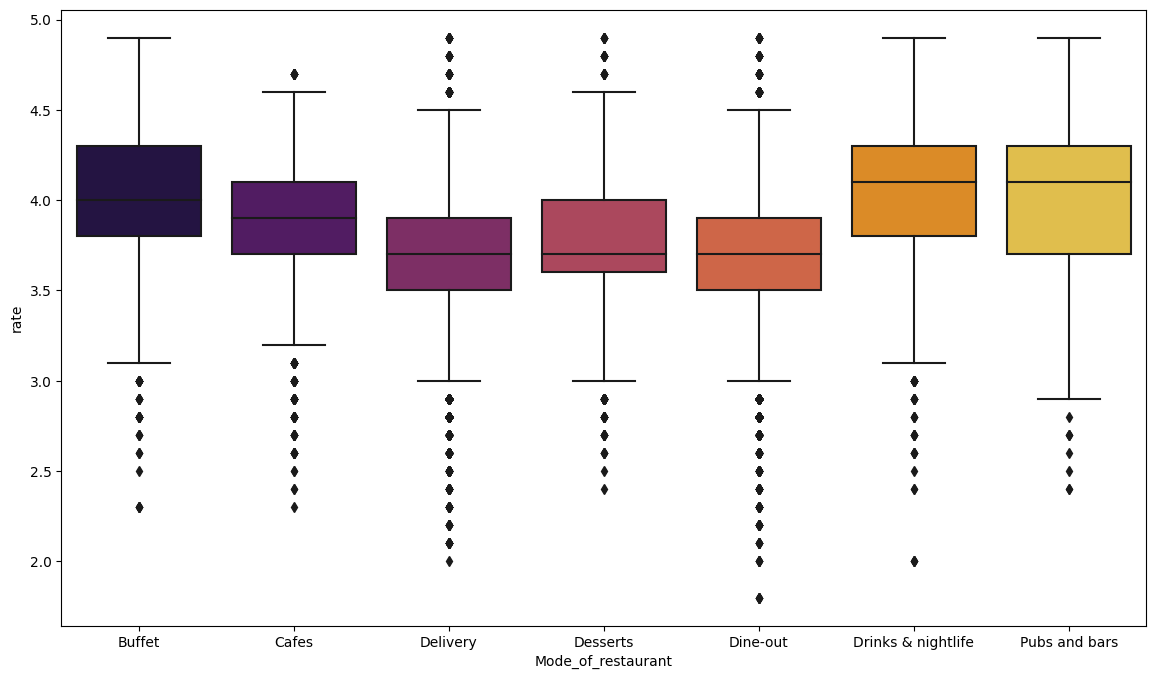

In [ ]:
plt.figure(figsize=(14,8))
sns.boxplot(x='Mode_of_restaurant',y='rate',data=data,palette='inferno')

Drinks & nightlife has highest rating


Grouping Types of Restaurants, location wise


In [ ]:
df3=data.groupby(['listed_in(city)','Mode_of_restaurant'])['name'].count()
df3.to_csv('location_Type.csv')
df3=pd.read_csv('location_Type.csv')
df3=pd.pivot_table(df3,values=None,index=['listed_in(city)'],columns=['Mode_of_restaurant'],fill_value=0,aggfunc=np.sum)
df3

name                                   \
Mode_of_restaurant    Buffet Cafes Delivery Desserts Dine-out   
listed_in(city)                                                 
BTM                       39   100     1773      195     1048   
Banashankari               7    24      461       59      300   
Bannerghatta Road         17    42      903      116      506   
Basavanagudi              15    46      637      109      446   
Bellandur                 29    27      658       79      381   
Brigade Road              57    83      694      134      644   
Brookefield               33    35      845       86      483   
Church Street             60    87      652      137      699   
Electronic City           22    24      556       71      502   
Frazer Town               14    46      651       87      358   
HSR                       21    48      994      113      521   
Indiranagar               38    82      843      148      620   
JP Nagar                  25    62     1137      155      674   
Jayanagar                 29    76     1364      173      694   
Kalyan Nagar              11    54      656       90      467   
Kammanahalli               0    55      670       96      476   
Koramangala 4th Block     44   108     1493      164      894   
Koramangala 5th Block     37    45     1515      177      920   
Koramangala 6th Block     35   103     1387      171      857   
Koramangala 7th Block     38   105     1516      183      958   
Lavelle Road              64    83      625      132      747   
MG Road                   54    79      735      140      645   
Malleshwaram              22    29      544       89      366   
Marathahalli              32    28      849       98      610   
New BEL Road               4    29      373       43      275   
Old Airport Road          27    53      704      107      437   
Rajajinagar               17    22      451      102      437   
Residency Road            59    78      612      131      660   
Sarjapur Road             26    31      640       83      426   
Whitefield                 0    38      774      111      607   

                                                        
Mode_of_restaurant    Drinks & nightlife Pubs and bars  
listed_in(city)                                         
BTM                                   45            51  
Banashankari                           8             0  
Bannerghatta Road                     18             0  
Basavanagudi                          12             0  
Bellandur                             18            18  
Brigade Road                          77            77  
Brookefield                           14             0  
Church Street                         80            77  
Electronic City                       21            21  
Frazer Town                           11            16  
HSR                                   14            22  
Indiranagar                           58            58  
JP Nagar                              23             0  
Jayanagar                             23             0  
Kalyan Nagar                          15             0  
Kammanahalli                          16             0  
Koramangala 4th Block                 61             0  
Koramangala 5th Block                 58            65  
Koramangala 6th Block                 58             0  
Koramangala 7th Block                 59            64  
Lavelle Road                          86             0  
MG Road                               74            75  
Malleshwaram                          23            20  
Marathahalli                          22             0  
New BEL Road                           7             7  
Old Airport Road                      40            44  
Rajajinagar                           20            24  
Residency Road                        76             0  
Sarjapur Road                         21            20  
Whitefield                            36            35

<Axes: xlabel='listed_in(city)'>

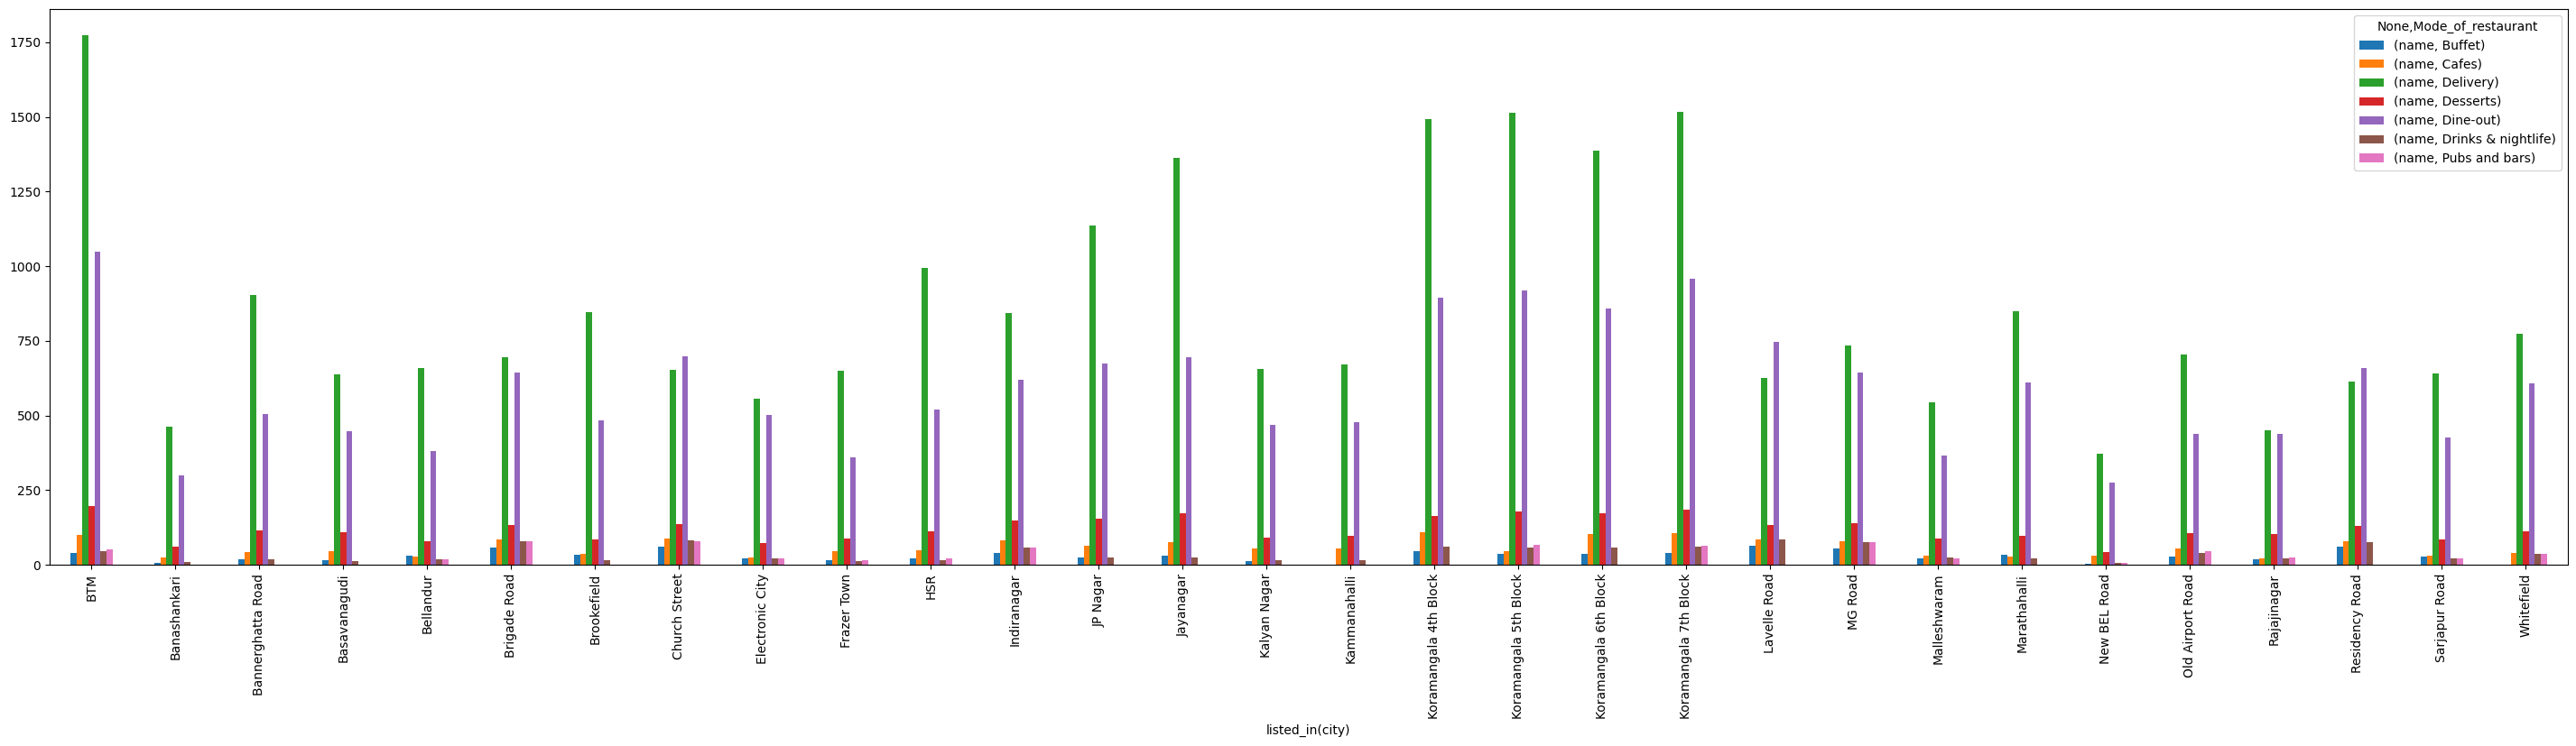

In [ ]:
df3.plot(kind='bar',figsize=(36,8))


Inference:
In most of the locations,delivery is the most preferred one compared to others

changing cuisines and rest_type columns as list

In [ ]:
data1['cuisines'].fillna("", inplace=True)
data1['cuisines'] = data1['cuisines'].apply(lambda x: x.split(', ') if x else [])

data1['rest_type'].fillna("", inplace=True)
data1['rest_type'] = data1['rest_type'].apply(lambda x: x.split(', ') if x else [])
data1

,name,online_order,book_table,rate,votes,rest_type,cuisines,Cost_of_two,Mode_of_restaurant,listed_in(city)
0,Jalsa,Yes,Yes,4.100000,775,[Casual Dining],"[North Indian, Mughlai, Chinese]",4.100000,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.100000,787,[Casual Dining],[others],4.100000,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.800000,918,[others],[others],3.800000,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.700000,88,[Quick Bites],"[South Indian, North Indian]",3.700000,Buffet,Banashankari
4,Grand Village,No,No,3.800000,166,[Casual Dining],[others],3.800000,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.600000,27,[others],[Continental],3.600000,Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,3.700449,0,[others],[Finger Food],3.700449,Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,3.700449,0,[others],[Finger Food],3.700449,Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.300000,236,[others],[Finger Food],4.300000,Pubs and bars,Whitefield


Expanded the rest_type and cuisines columns to multiple columns for each individual value in list

In [ ]:
rest_type_dummies = pd.get_dummies(pd.DataFrame(data1['rest_type'].tolist(), index=data1.index))
data1 = pd.concat([data1, rest_type_dummies], axis=1)
data1 = data1.drop('rest_type', axis=1)

In [ ]:
cuisines_dummies = pd.get_dummies(pd.DataFrame(data1['cuisines'].tolist(),index=data1.index))
data1 = pd.concat([data1, cuisines_dummies], axis=1)
data1 = data1.drop('cuisines', axis=1)

label encoder is used to assign integer values for the categorical columns

In [ ]:
label_encoder = LabelEncoder()

data1['name'] = label_encoder.fit_transform(data1['name'].astype(str))
data1['online_order'] = label_encoder.fit_transform(data1['online_order'].astype(str))
data1['book_table'] = label_encoder.fit_transform(data1['book_table'].astype(str))
data1['listed_in(city)'] = label_encoder.fit_transform(data1['listed_in(city)'].astype(str))
data1['Mode_of_restaurant'] = label_encoder.fit_transform(data1['Mode_of_restaurant'].astype(str))

data1

,name,online_order,book_table,rate,votes,Cost_of_two,Mode_of_restaurant,listed_in(city),0_Bakery,0_Cafe,...,1_Thai,2_Biryani,2_Chinese,2_Continental,2_Fast Food,2_Momos,2_North Indian,2_Seafood,2_South Indian,3_Street Food
0,3676,1,1,4.100000,775,4.100000,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,6992,1,0,4.100000,787,4.100000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6472,1,0,3.800000,918,3.800000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,198,0,0,3.700000,88,3.700000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2930,0,0,3.800000,166,3.800000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,896,0,0,3.600000,27,3.600000,6,29,0,0,...,0,0,0,0,0,0,0,0,0,0
51713,8468,0,0,3.700449,0,3.700449,6,29,0,0,...,0,0,0,0,0,0,0,0,0,0
51714,5808,0,0,3.700449,0,3.700449,6,29,0,0,...,0,0,0,0,0,0,0,0,0,0
51715,1722,0,1,4.300000,236,4.300000,6,29,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51335 entries, 0 to 51716
Data columns (total 66 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                51335 non-null  int64  
 1   online_order        51335 non-null  int64  
 2   book_table          51335 non-null  int64  
 3   rate                51335 non-null  float64
 4   votes               51335 non-null  int64  
 5   Cost_of_two         51335 non-null  float64
 6   Mode_of_restaurant  51335 non-null  int64  
 7   listed_in(city)     51335 non-null  int64  
 8   0_Bakery            51335 non-null  uint8  
 9   0_Cafe              51335 non-null  uint8  
 10  0_Casual Dining     51335 non-null  uint8  
 11  0_Delivery          51335 non-null  uint8  
 12  0_Dessert Parlor    51335 non-null  uint8  
 13  0_Quick Bites       51335 non-null  uint8  
 14  0_Takeaway          51335 non-null  uint8  
 15  0_others            51335 non-null  uint8  
 16  1_Ba